In [29]:
import histomicstk as htk
import numpy as np
import scipy as sp
import skimage.io
import skimage.measure
import skimage.color
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24
classification1 = []
totalseg = []
mm=0


import os
imageList = os.listdir('/disk1/cell_work/data/BM_GRAZ_HE_label/')
for i in imageList[0:11]:#len(imageList)]:
    root = '/disk1/cell_work/data/BM_GRAZ_HE_label/'+i
    inputImageFile = (root)  # Easy1.png
    imInput = skimage.io.imread(inputImageFile)[:, :, :3]
    refImageFile = ('/disk1/rpn/data/BM_GRAZ/source/BM_GRAZ_HE_0007_01.png')  # L1.png
    imReference = skimage.io.imread(refImageFile)[:, :, :3]
    # get mean and stddev of reference image in lab space
    meanRef, stdRef = htk.preprocessing.color_conversion.lab_mean_std(imReference)
    # perform reinhard color normalization
    imNmzd = htk.preprocessing.color_normalization.reinhard(imInput, meanRef, stdRef)

    w_est = htk.preprocessing.color_deconvolution.rgb_separate_stains_macenko_pca(imNmzd,I_0=255 )
    I_0=255
    stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map
    # specify stains of input image
    stains = ['hematoxylin',  # nuclei stain
              'eosin',        # cytoplasm stain
              'null']    
    # Perform color deconvolution
    deconv_result = htk.preprocessing.color_deconvolution.color_deconvolution(imInput, w_est, I_0)
    #print('Estimated stain colors (rows):', w_est.T[:2])
    # Display results
        #print channel
       # plt.imshow(deconv_result.Stains[:, :, channel])
       # _ = plt.title(stains[i], fontsize=titlesize)



    imNucleiStain = deconv_result.Stains[:, :, 1]
    #plt.figure()
    #plt.imshow(imNucleiStain)
    #imNucleiStain =imDeconvolved[:, :, 0]
    foreground_threshold =120

    imFgndMask = sp.ndimage.morphology.binary_fill_holes(
        imNucleiStain < foreground_threshold)



    min_radius = 5
    max_radius = 30
    imLog = htk.filters.shape.clog(imNucleiStain, imFgndMask,
                                   sigma_min=min_radius * np.sqrt(2),
                                   sigma_max=max_radius * np.sqrt(2))
    # detect and segment nuclei using local maximum clustering
    local_max_search_radius = 10
    imNucleiSegMask1, Seeds, Max = htk.segmentation.nuclear.max_clustering(
        imLog[0], imFgndMask, local_max_search_radius)
    # filter out small objects
    min_nucleus_area = 200
    imNucleiSegMask = htk.segmentation.label.area_open(
        imNucleiSegMask1, min_nucleus_area).astype(np.int)
    # compute nuclei properties
    #objProps = skimage.measure.regionprops(imNucleiSegMask)
    print 'step one done'
    
    
    imNucleicompact = htk.segmentation.label.compact(imNucleiSegMask, compaction=3)
    k= (imNucleicompact==-1)
    imNucleicompact1=np.copy(k)
    plt.rcParams['figure.figsize'] = 15,15    
    for ii in range(0,1200):
        for jj in range(0,1200):
            if imNucleicompact[ii,jj]>0:
                imNucleicompact1[ii,jj]=1

    imNucleicompact2 = skimage.measure.label(imNucleicompact1,connectivity = 1)
    
    imNucleicompact2 = skimage.measure.label(imNucleicompact1,connectivity = 1)
    imInput2 = np.copy(imInput)
    plt.rcParams['figure.figsize'] = 1, 1
    listt = []
    seglis = []
    import cv2
    for i in range(1,imNucleicompact2.max()):

        k =  (imNucleicompact2==i)
        location = np.where(k == 1)
        x_min, y_min = min(location[0]),min(location[1])
        x_max, y_max = max(location[0]),max(location[1])
        space = (x_max-x_min)*(y_max-y_min)

        if space<450 and space>100:
            segmentate = k[x_min:x_max,y_min:y_max]
            segmentate = np.tile(np.expand_dims(segmentate,axis=2),(1,1,3))
            listt.append([x_min,y_min,x_max,y_max])
            seglis.append(segmentate)
            #plt.imshow(img)
            #plt.show()

        if space>449:
            #print i
            #print space
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7, 7)) 
            k.dtype=np.uint8
            eroded=cv2.erode(k,kernel);
            dilated = cv2.dilate(eroded,kernel)
            new_seg = skimage.measure.label(dilated,connectivity = 1)
            for j in range (1,new_seg.max()+1):
                #print 'j=',j
                kk =  (new_seg==j)
                location1 = np.where(kk == 1)
                x_min1, y_min1 = min(location1[0]),min(location1[1])
                x_max1, y_max1 = max(location1[0]),max(location1[1])
                space1 = (x_max1-x_min1)*(y_max1-y_min1)
                if space1< 800:
                    segmentate = kk[x_min1:x_max1,y_min1:y_max1]
                    segmentate = np.tile(np.expand_dims(segmentate,axis=2),(1,1,3))
                    listt.append([x_min1,y_min1,x_max1,y_max1])
                    seglis.append(segmentate)
                    #plt.imshow(img1)
                #plt.show()
    classification1.append(listt)
    totalseg.append(seglis)
    

step one done
step one done
step one done
step one done
step one done
step one done
step one done
step one done
step one done
step one done
step one done


In [26]:
print len(classification1[0])
print len(totalseg[0])

555
555


In [8]:
imageList = os.listdir('/disk1/cell_work/data/BM_GRAZ_HE_label/')
for i in imageList[0:len(imageList)]:
    print i

BM_GRAZ_HE_0001_02.png
BM_GRAZ_HE_0008_01.png
BM_GRAZ_HE_0002_01.png
BM_GRAZ_HE_0007_01.png
BM_GRAZ_HE_0002_02.png
BM_GRAZ_HE_0006_01.png
BM_GRAZ_HE_0020_01.png
BM_GRAZ_HE_0001_01.png
BM_GRAZ_HE_0004_01.png
BM_GRAZ_HE_0003_02.png
BM_GRAZ_HE_0003_01.png


In [35]:
def creat_list(listt):
    newseg_lis=[]
    for img in listt:
        color_mean = img.mean(axis=2)
        for i in range(0, color_mean.shape[0]):
            for j in range(0, color_mean.shape[1]):
                if color_mean[i,j] == 0.0:
                    img[i,j,:] = 255

        height, width = img.shape[0], img.shape[1]
        if max(height,width)>32:
            scale = 32/float(max(height,width))
            height, width = int(height*scale), int(width*scale)
            img = sp.misc.imresize(img, (height, width))

        npad = ((16-height/2,32-height-(16-height/2)),(16-width/2,32-width-(16-width/2)),(0,0))
        segmentate_image = np.pad(img, pad_width=npad,constant_values=255,mode='constant')
        newseg_lis.append(segmentate_image)
    return newseg_lis

In [48]:
from PIL import Image
imageList = os.listdir('/disk1/cell_work/data/source/')
tlinba = []
tjuhe =[]
tdanhe = []
tyuanshi = []
tzxli = []
linba = '/disk1/cell_work/data/label_assist/linbacheng.png'
juhe = '/disk1/cell_work/data/label_assist/juhehuang.png'
danhe = '/disk1/cell_work/data/label_assist/danheqin.png'
yuanshi = '/disk1/cell_work/data/label_assist/yuanshihong.png'
zxli = '/disk1/cell_work/data/label_assist/lilan.png'

for ii in range(0,11):
    root = '/disk1/cell_work/data/BM_GRAZ_HE_label/'+imageList[ii]
    root1 = '/disk1/cell_work/data/source/'+imageList[ii]
    inputImageFile = (root)  # Easy1.png
    imInput = skimage.io.imread(inputImageFile)[:, :, :3]
    inputImageFile1 = (root1)  # Easy1.png
    imInput1 = skimage.io.imread(inputImageFile1)[:, :, :3]
    print ii
    for jj in range(0,len(classification1[ii])):
        img = imInput[classification1[ii][jj][0]:classification1[ii][jj][2],classification1[ii][jj][1]:classification1[ii][jj][3],:]
        trueimg = imInput1[classification1[ii][jj][0]:classification1[ii][jj][2],classification1[ii][jj][1]:classification1[ii][jj][3],:]
        q=0
        for x in range(0,img.shape[0]):
            for y in range(0,img.shape[1]):
                #yuanshi
                if [img[x,y,0],img[x,y,1],img[x,y,2]] == [237,28,36]:
                    img1 = trueimg*totalseg[ii][jj]
                    tyuanshi.append(img1)
                    q=1
                    if (q==1):
                        break
                if (q==1):
                    break
                    #tyuanshi.append([classification1[ii][jj][0],classification1[ii][jj][1],classification1[ii][jj][2],classification1[ii][jj][3]])
                #linba
                if [img[x,y,0],img[x,y,1],img[x,y,2]] == [255,127,39]:
                    img1 = trueimg*totalseg[ii][jj]
                    tlinba.append(img1)
                    q=1
                    if (q==1):
                        break
                if (q==1):
                    break
                #zxli
                if [img[x,y,0],img[x,y,1],img[x,y,2]] == [63,72,204]:
                    img1 = trueimg*totalseg[ii][jj]
                    tzxli.append(img1)
                    q=1
                    if (q==1):
                        break
                if (q==1):
                    break
                #danhe
                if [img[x,y,0],img[x,y,1],img[x,y,2]] == [153,217,234]:
                    img1 = trueimg*totalseg[ii][jj]
                    tdanhe.append(img1)
                    q=1
                    if (q==1):
                        break
                if (q==1):
                    break
                #juhe
                if [img[x,y,0],img[x,y,1],img[x,y,2]] == [255,242,0]:
                    img1 = trueimg*totalseg[ii][jj]
                    tjuhe.append(img1)
                    q=1
                    if (q==1):
                        break
                if (q==1):
                    break
tyuanshi1=creat_list(tyuanshi)    
im_yuanshi=np.array(tyuanshi1)
np.save('/disk1/im_yuanshi.npy',im_yuanshi)

tlinba1=creat_list(tlinba)
im_linba=np.array(tlinba1)
np.save('/disk1/im_linba.npy',im_linba)

tzxli1=creat_list(tzxli)
im_zxli=np.array(tzxli1)
np.save('/disk1/im_zxli.npy',im_zxli)

tdanhe1=creat_list(tdanhe)
im_danhe=np.array(tdanhe1)
np.save('/disk1/im_danhe.npy',im_danhe)

tjuhe1=creat_list(tjuhe)
im_juhe=np.array(tjuhe1)
np.save('/disk1/im_juhe.npy',im_juhe)

    
    


0
1
2
3
4
5
6
7
8
9
10


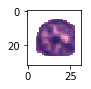

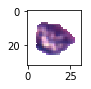

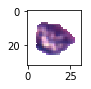

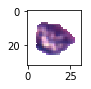

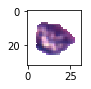

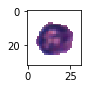

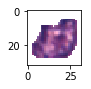

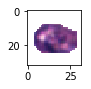

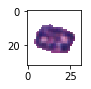

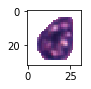

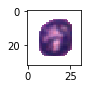

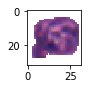

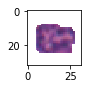

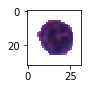

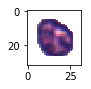

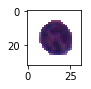

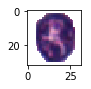

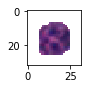

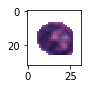

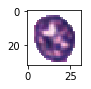

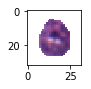

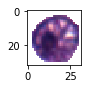

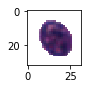

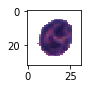

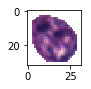

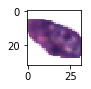

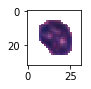

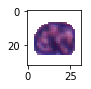

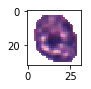

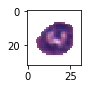

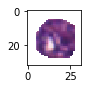

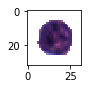

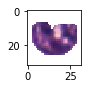

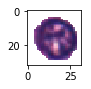

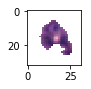

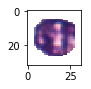

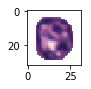

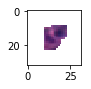

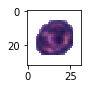

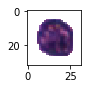

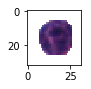

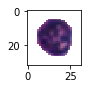

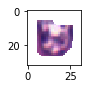

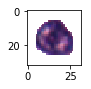

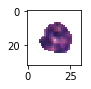

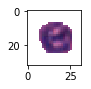

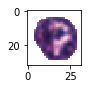

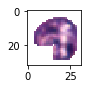

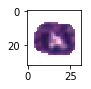

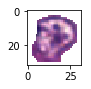

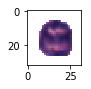

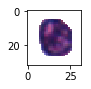

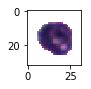

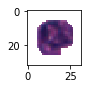

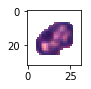

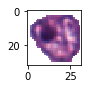

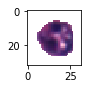

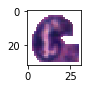

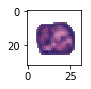

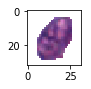

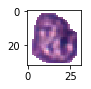

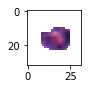

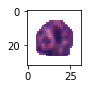

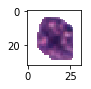

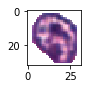

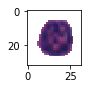

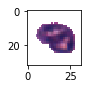

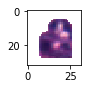

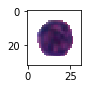

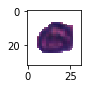

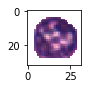

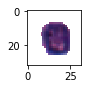

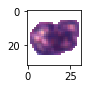

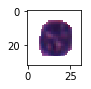

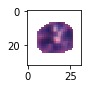

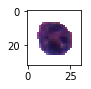

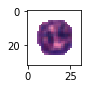

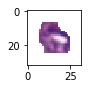

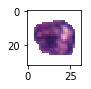

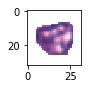

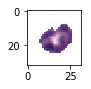

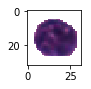

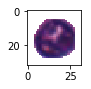

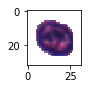

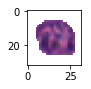

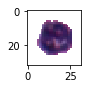

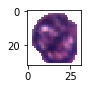

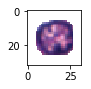

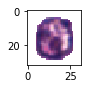

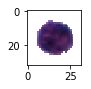

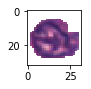

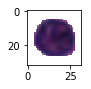

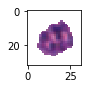

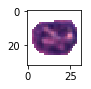

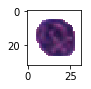

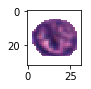

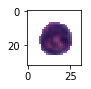

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1013, in getframeinfo
    lines, lnum = findsource(frame)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 170, in findsource
    file = getsourcefile(object) or getfile(object)
  File "/usr/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule

IndexError: string index out of range

In [54]:
for i in tyuanshi1[0:100]:
    plt.imshow(i)
    plt.show()

742

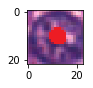

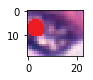

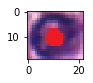

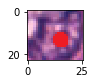

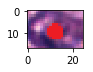

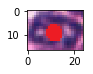

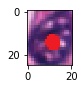

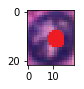

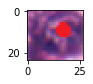

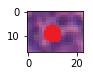

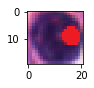

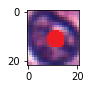

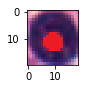

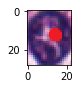

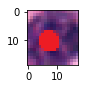

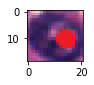

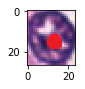

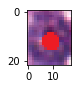

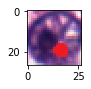

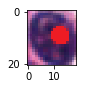

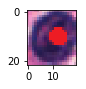

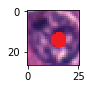

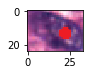

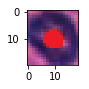

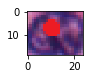

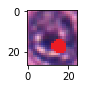

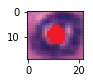

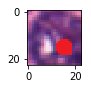

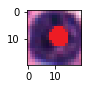

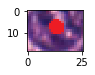

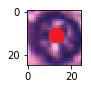

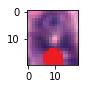

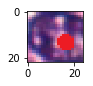

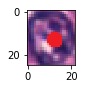

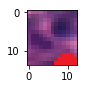

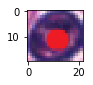

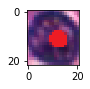

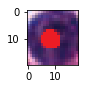

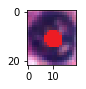

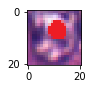

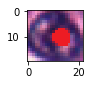

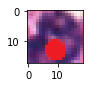

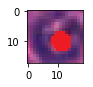

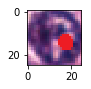

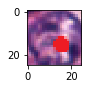

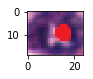

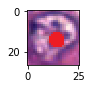

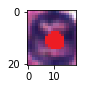

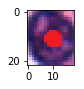

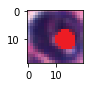

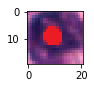

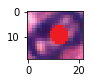

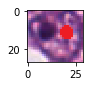

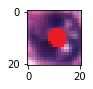

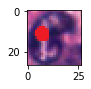

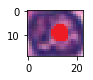

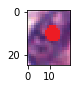

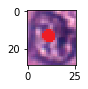

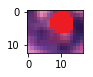

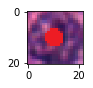

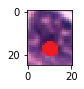

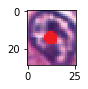

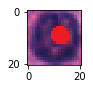

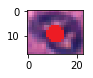

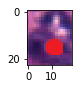

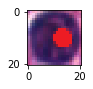

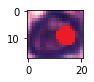

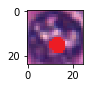

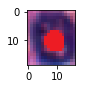

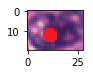

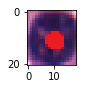

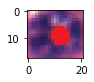

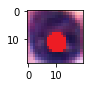

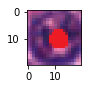

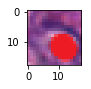

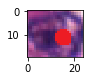

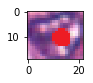

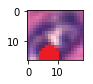

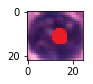

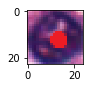

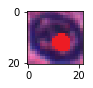

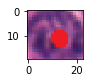

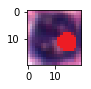

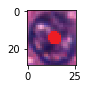

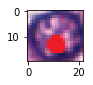

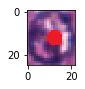

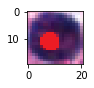

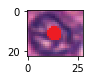

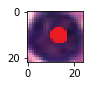

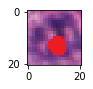

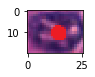

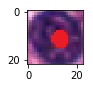

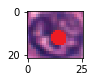

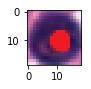

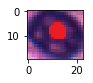

In [4]:
import histomicstk as htk
import numpy as np
import scipy as sp
import skimage.io
import skimage.measure
import skimage.color
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

plt.rcParams['figure.figsize'] = 1, 1
root = '/disk1/cell_work/data/BM_GRAZ_HE_label/BM_GRAZ_HE_0001_02.png'
inputImageFile = (root)  # Easy1.png
imInput = skimage.io.imread(inputImageFile)[:, :, :3]
imInput2 = np.copy(imInput)
#np.set_printoptions(threshold='nan') 
for i in range(0,len(tyuanshi2)):
    img1 = imInput[tyuanshi2[i][0]:tyuanshi2[i][2],tyuanshi2[i][1]:tyuanshi2[i][3],:]
    plt.imshow(img1)
    plt.show()

In [4]:
import os
imageList = os.listdir('/disk1/cell_work/data/BM_GRAZ_HE_label/')
print imageList

['BM_GRAZ_HE_0001_02.png', 'BM_GRAZ_HE_0008_01.png', 'BM_GRAZ_HE_0002_01.png', 'BM_GRAZ_HE_0007_01.png', 'BM_GRAZ_HE_0002_02.png', 'BM_GRAZ_HE_0006_01.png', 'BM_GRAZ_HE_0020_01.png', 'BM_GRAZ_HE_0001_01.png', 'BM_GRAZ_HE_0004_01.png', 'BM_GRAZ_HE_0003_02.png', 'BM_GRAZ_HE_0003_01.png']


In [50]:
plt.rcParams['figure.figsize'] = 1, 1
root = '/disk1/cell_work/data/BM_GRAZ_HE_label/BM_GRAZ_HE_0001_02.png'
inputImageFile = (root)  # Easy1.png
imInput = skimage.io.imread(inputImageFile)[:, :, :3]
imInput2 = np.copy(imInput)
img_list = []
true_img_list = []
#for ii in range(0,11):
for i in range(0,len(classification1[0])):
    img1 = imInput[classification1[0][i][0]:classification1[0][i][2],classification1[0][i][1]:classification1[0][i][3],:]
    img_list.append(img1)
        #plt.imshow(img1)
        #plt.show()

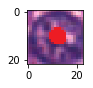

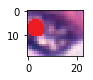

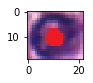

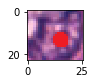

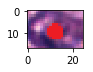

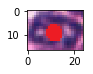

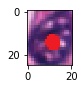

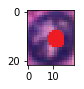

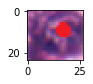

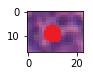

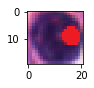

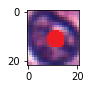

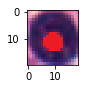

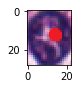

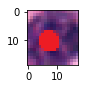

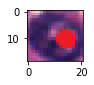

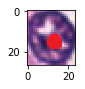

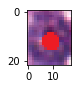

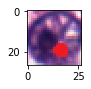

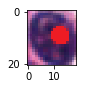

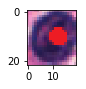

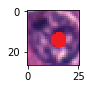

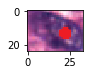

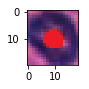

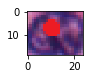

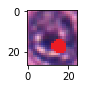

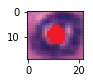

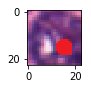

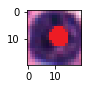

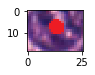

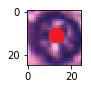

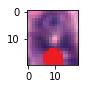

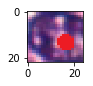

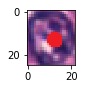

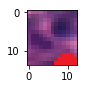

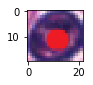

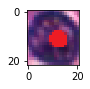

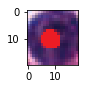

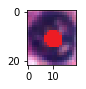

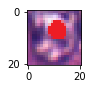

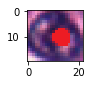

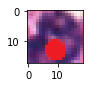

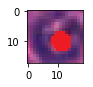

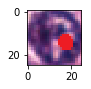

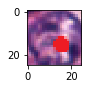

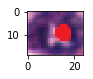

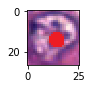

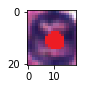

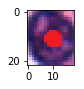

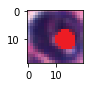

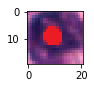

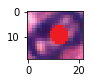

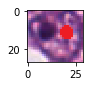

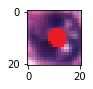

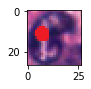

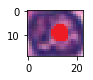

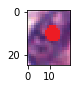

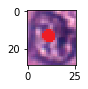

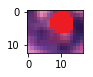

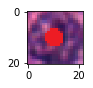

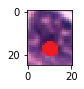

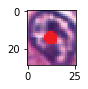

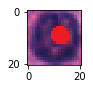

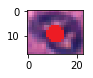

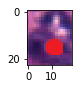

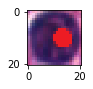

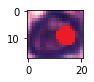

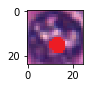

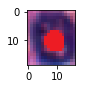

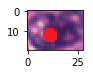

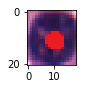

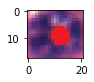

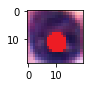

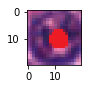

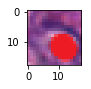

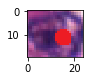

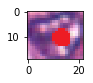

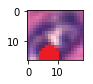

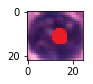

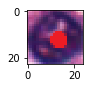

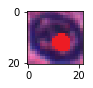

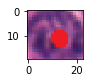

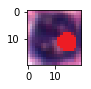

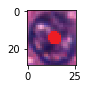

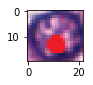

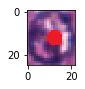

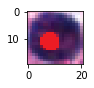

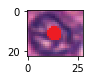

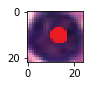

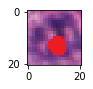

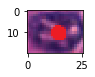

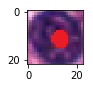

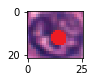

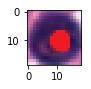

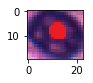

In [62]:
for i in img_list:
    q = 0
    for m in range(0,i.shape[0]):
        for n in range(0,i.shape[1]):
            if [i[m,n,0],i[m,n,1],i[m,n,2]] == [237,28,36]:
                q = 1
                plt.imshow(i)
                plt.show()
            if (q==1):
                break
        if (q==1):
            break

                

In [56]:
i[m,n,:] == np.array([237,28,36])

array([False, False, False], dtype=bool)

In [42]:
for i in img_list:

555

In [ ]:
def read_img(img_name):
    plt.rcParams['figure.figsize'] = 1, 1
    root = '/disk1/cell_work/data/BM_GRAZ_HE_label/BM_GRAZ_HE_0001_02.png'
    inputImageFile = (root)  # Easy1.png
    imInput = skimage.io.imread(inputImageFile)[:, :, :3]
    imInput2 = np.copy(imInput)
    img_list = []
    true_img_list = []
    for ii in range(0,11):
        for i in range(0,len(classification1[ii])):
            img1 = imInput[classification1[ii][i][0]:classification1[ii][i][2],classification1[ii][i][1]:classification1[ii][i][3],:]

            img_list.append(img1)
            #plt.imshow(img1)
            #plt.show()